# Looking into the North Pacific Oscillation...

In [49]:
import numpy as np
import pandas as pd
import xarray as xr
import esmtools as et
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ocn-clim')
import scipy.signal

In [34]:
def detrend(ds):
    detrended = scipy.signal.detrend(ds)
    return xr.DataArray(detrended)

In [88]:
ds_co2 = xr.open_dataset('/glade/u/home/rbrady/work/EBUS_BGC_Variability/FG_ALT_CO2/' + 
                         'CalCS/filtered_output/calcs-FG_ALT_CO2-residuals-AW-chavez-800km.nc')
ds_co2 = ds_co2['FG_ALT_CO2_AW'][2]

In [89]:
ds_clim = xr.open_dataset('/glade/p/work/rbrady/cesmLE_CVDP/CESM1-CAM5-BGC-LE_009.cvdp_data.1920-2015.nc',
                          decode_times=False)
ds_clim = ds_clim['npo_pc_mon']
ds_clim['time'] = ds_co2['time']
ds_clim = ds_clim.to_dataset().apply(detrend)

/glade/u/home/rbrady/.local/lib/python3.6/site-packages/xarray/conventions.py:1026: RuntimeWarning: variable has _Unsigned attribute but is not of integer type. Ignoring attribute.
  decode_coords, drop_variables=drop_variables)


# Eye Test Plot

In [90]:
ds_clim

<xarray.Dataset>
Dimensions:     (dim_0: 1152)
Dimensions without coordinates: dim_0
Data variables:
    npo_pc_mon  (dim_0) float64 -0.4504 1.831 -0.1375 1.914 0.7922 1.14 ...

[(700900.0, 735599.0)]

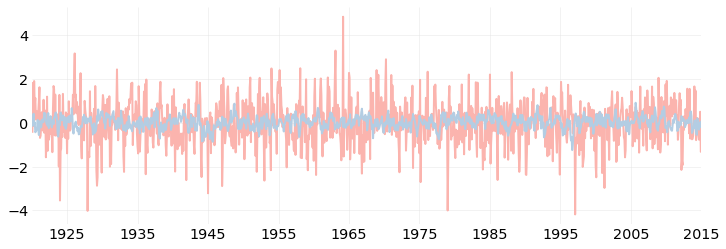

In [91]:
f, ax = plt.subplots(figsize=(12,4))
plt.plot(ds_co2.time, ds_clim['npo_pc_mon'], linewidth=2)
plt.plot(ds_co2.time, ds_co2, linewidth=2)
ax.set(xlim=['1920', '2015'])

In [92]:
m,b,r,p,e = et.stats.linear_regression(ds_clim['npo_pc_mon'], ds_co2)

In [93]:
r

-0.13164599509325667

Ensemble members consistently give an r value on the order of 0.13. Perhaps a proper NPGO index would do a lot better job, even though it really is the oceanic extension of NPGO.